### Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import train_test_split
from keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.preprocessing import MinMaxScaler

### Creating Synthetic Data & Visualization

In [ ]:
# Sequence 11 Dates
dates = pd.date_range(start='01-01-2020', end='28-02-2020' , freq='1D')

# Random money balance from 2 milion to 0
money = []
temp = []
for a in range(2):
  for x in range(30):
    temp.append(random.randrange(0,2000000,50000))
    temp.sort(reverse=True)
  money += temp
  temp = []
money.pop(-1)

# Creating Data
data = {'Tanggal':dates, 
        'Keuangan sebenarnya':money} 

In [ ]:
# Load data to dataframe
df = pd.DataFrame(data)
df

,Tanggal,Keuangan sebenarnya
0,2020-01-01,1900000
1,2020-01-02,1800000
2,2020-01-03,1500000
3,2020-01-04,1500000
4,2020-01-05,1450000
5,2020-01-06,1300000
6,2020-01-07,1250000
7,2020-01-08,1150000
8,2020-01-09,1050000
9,2020-01-10,1050000


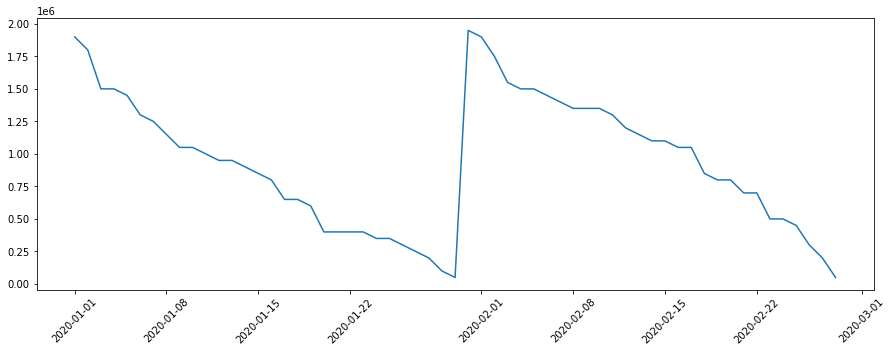

In [ ]:
money = df['Keuangan sebenarnya'].values
dates = df['Tanggal'].values
plt.figure(figsize=(15,5))
plt.plot(dates, money)
plt.xticks(rotation=45)
plt.show()

## Normalize data

In [ ]:
minmaxscaler = MinMaxScaler(feature_range = (0,1))
scaled = minmaxscaler.fit_transform(df[['Keuangan sebenarnya']])
df[['Keuangan sebenarnya']] = scaled
df

,Tanggal,Keuangan sebenarnya
0,2020-01-01,0.973684
1,2020-01-02,0.921053
2,2020-01-03,0.763158
3,2020-01-04,0.763158
4,2020-01-05,0.736842
5,2020-01-06,0.657895
6,2020-01-07,0.631579
7,2020-01-08,0.578947
8,2020-01-09,0.526316
9,2020-01-10,0.526316


## Split data

In [ ]:
n_features = 2
n_label = 1

In [ ]:
df_train, df_test = train_test_split(df, test_size=0.2, shuffle=False)

In [ ]:
money_train = df_train['Keuangan sebenarnya'].values
money_train = money_train.reshape((len(money_train), 1))
money_test = df_test['Keuangan sebenarnya'].values
money_test = money_test.reshape((len(money_test), 1))

In [ ]:
print(len(money_train))
print(len(money_test))

47
12


## Prepare data for model training

In [ ]:
train_sets = TimeseriesGenerator(money_train, money_train, length=n_features, batch_size=n_label)
test_sets = TimeseriesGenerator(money_test, money_test, length=n_features, batch_size=n_label)

In [ ]:
for i in range(2):
	x, y = train_sets[i]
	print('%s => %s' % (x, y))

[[[0.97368421]
  [0.92105263]]] => [[0.76315789]]
[[[0.92105263]
  [0.76315789]]] => [[0.76315789]]


## First Model Creation

1 layer RNN with first layer consist of 16 units.

Last layer = prediction layer

### Model Architecture

In [221]:
tf.keras.backend.clear_session()
model = tf.keras.models.Sequential([
  tf.keras.layers.SimpleRNN(16, input_shape=(n_features,n_label), activation='relu', name="Recurrent_Layer"),
  tf.keras.layers.Dense(1, name="Fully_Connected_Layer"),
])

In [222]:
# tf.keras.backend.set_epsilon(1)
model.compile(loss=tf.keras.losses.Huber(),
              optimizer= tf.keras.optimizers.Adam(),
              metrics=["mae"])

In [223]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Recurrent_Layer (SimpleRNN)  (None, 16)                288       
_________________________________________________________________
Fully_Connected_Layer (Dense (None, 1)                 17        
Total params: 305
Trainable params: 305
Non-trainable params: 0
_________________________________________________________________


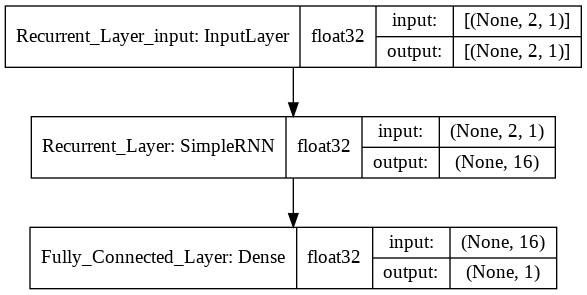

In [224]:
tf.keras.utils.plot_model(model, show_shapes=True, show_dtype=True, expand_nested=True)

### Model Creation

In [225]:
history = model.fit(train_sets, epochs=200, validation_data=test_sets, callbacks=custom_callback)

Epoch 1/200
45/45 [==============================] - 1s 7ms/step - loss: 0.1542 - mae: 0.4855 - val_loss: 0.0197 - val_mae: 0.1681
Epoch 2/200
45/45 [==============================] - 0s 3ms/step - loss: 0.0832 - mae: 0.3195 - val_loss: 0.0086 - val_mae: 0.1143
Epoch 3/200
45/45 [==============================] - 0s 3ms/step - loss: 0.0756 - mae: 0.3202 - val_loss: 0.0054 - val_mae: 0.0885
Epoch 4/200
45/45 [==============================] - 0s 3ms/step - loss: 0.0495 - mae: 0.2521 - val_loss: 0.0065 - val_mae: 0.0922
Epoch 5/200
45/45 [==============================] - 0s 3ms/step - loss: 0.0220 - mae: 0.1815 - val_loss: 0.0097 - val_mae: 0.1097
Epoch 6/200
45/45 [==============================] - 0s 3ms/step - loss: 0.0272 - mae: 0.1728 - val_loss: 0.0132 - val_mae: 0.1382
Epoch 7/200
45/45 [==============================] - 0s 3ms/step - loss: 0.0259 - mae: 0.1692 - val_loss: 0.0161 - val_mae: 0.1601
Epoch 8/200
45/45 [==============================] - 0s 3ms/step - loss: 0.0169 - m

### Model Evaluation

In [226]:
model.evaluate(test_sets)

10/10 [==============================] - 0s 2ms/step - loss: 9.7159e-04 - mae: 0.0379


[0.0009715913911350071, 0.037894558161497116]

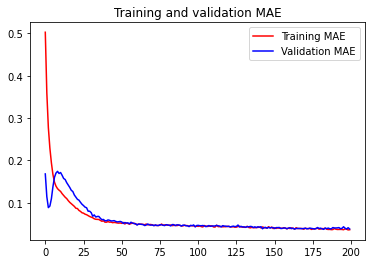

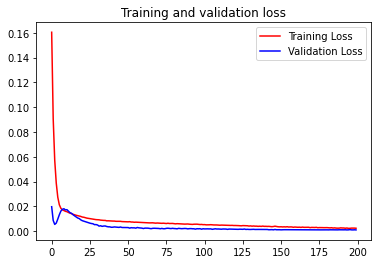

In [227]:
mae = history.history['mae']
val_mae = history.history['val_mae']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(mae))

plt.plot(epochs, mae, 'r', label='Training MAE')
plt.plot(epochs, val_mae, 'b', label='Validation MAE')
plt.title('Training and validation MAE')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### Whole data vs prediction

In [ ]:
df_whole = df.copy()
pred_data = df_whole["Keuangan sebenarnya"].values
pred_data = pred_data.reshape((len(pred_data)), 1)
pred_data = TimeseriesGenerator(pred_data, pred_data, length=n_features, batch_size=n_label)

In [ ]:
test_data = pred_data.data.copy()
predicted = []
for i in range(n_features):
  predicted.append(test_data[i][0])
for i in range(len(test_data)-2):
  topred = test_data[i+0:i+n_features,0]
  topred = topred.reshape(-1, n_features, 1)
  prediction = model.predict(topred)
  # print(f"{topred} => {prediction}")
  predicted.append(prediction[0][0])

In [ ]:
len(predicted)

59

In [ ]:
df_whole['Keuangan terprediksi'] = predicted
df_whole

,Tanggal,Keuangan sebenarnya,Keuangan terprediksi
0,2020-01-01,0.973684,0.973684
1,2020-01-02,0.921053,0.921053
2,2020-01-03,0.763158,0.843360
3,2020-01-04,0.763158,0.743635
4,2020-01-05,0.736842,0.724866
5,2020-01-06,0.657895,0.709222
6,2020-01-07,0.631579,0.650631
7,2020-01-08,0.578947,0.615581
8,2020-01-09,0.526316,0.567897
9,2020-01-10,0.526316,0.512850


In [ ]:
rescale1 = minmaxscaler.inverse_transform(df_whole[["Keuangan sebenarnya"]])
rescale2 = minmaxscaler.inverse_transform(df_whole[["Keuangan terprediksi"]])

In [ ]:
df_whole[["Keuangan sebenarnya"]] = rescale1
df_whole[["Keuangan terprediksi"]] = rescale2
df_whole

,Tanggal,Keuangan sebenarnya,Keuangan terprediksi
0,2020-01-01,1900000.0,1.900000e+06
1,2020-01-02,1800000.0,1.800000e+06
2,2020-01-03,1500000.0,1.652384e+06
3,2020-01-04,1500000.0,1.462906e+06
4,2020-01-05,1450000.0,1.427245e+06
5,2020-01-06,1300000.0,1.397522e+06
6,2020-01-07,1250000.0,1.286199e+06
7,2020-01-08,1150000.0,1.219603e+06
8,2020-01-09,1050000.0,1.129004e+06
9,2020-01-10,1050000.0,1.024414e+06


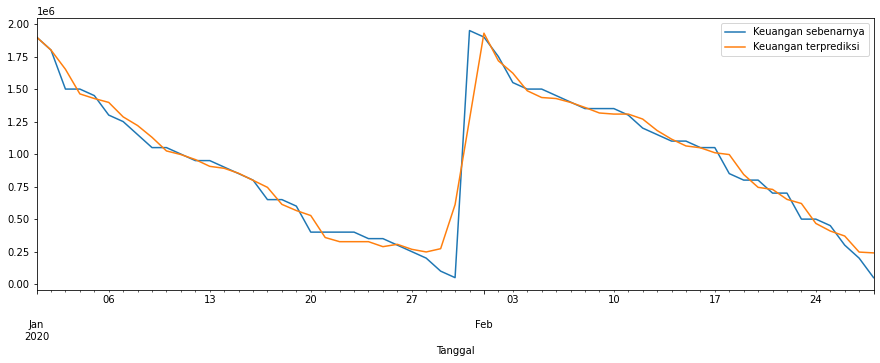

In [ ]:
df_whole.plot(x='Tanggal', y=["Keuangan sebenarnya","Keuangan terprediksi"], figsize=(15,5))
plt.show()

### Future Prediction (30 days)

In [ ]:
df_whole2 = df_whole.copy()
df_whole2 = df_whole2.drop(["Keuangan terprediksi"], axis=1)

In [ ]:
future_dates = pd.date_range(start='02-27-2020', freq='1D',periods=30)

In [ ]:
len(future_dates)

30

In [ ]:
future_data = np.zeros(30)
# future_data[0] = test_data[30:32,0][0]
# future_data[1] = test_data[30:32,0][1]
future_data[0] = test_data[-2:,0][0]
future_data[1] = test_data[-2:,0][1]
future_data = future_data.reshape((len(future_data)), 1)
for i in range(len(future_data)-2):
  topred = future_data[i+0:i+2,0]
  topred = topred.reshape(-1, 2, 1)
  prediction = model.predict(topred)
  # print(f"{topred} => {prediction}")
  future_data[2+i] = prediction

In [ ]:
# future_data = future_data[2:]
future_data = future_data.reshape(len(future_data))

In [ ]:
data2 = {'Tanggal':future_dates, 
        'Uang':future_data} 
df_future = pd.DataFrame(data2)
rescale3 = minmaxscaler.inverse_transform(df_future[["Uang"]])
df_future[["Uang"]] = rescale3
df_future

,Tanggal,Uang
0,2020-02-27,2.000000e+05
1,2020-02-28,5.000000e+04
2,2020-02-29,6.509585e+05
3,2020-03-01,1.426065e+06
4,2020-03-02,1.151852e+06
5,2020-03-03,1.168698e+06
6,2020-03-04,1.115867e+06
7,2020-03-05,1.080106e+06
8,2020-03-06,1.037928e+06
9,2020-03-07,9.956098e+05


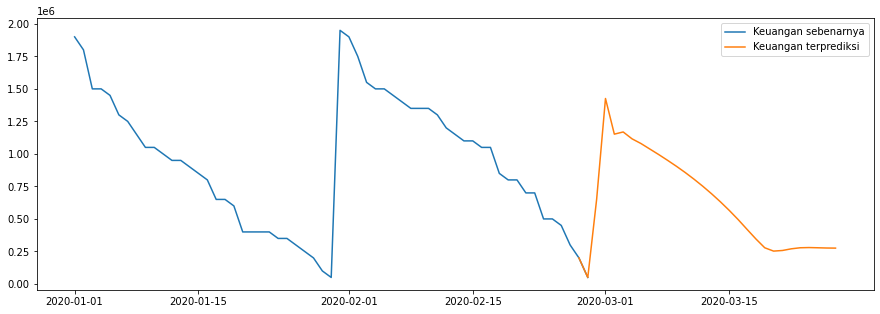

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(df_whole["Tanggal"],df_whole["Keuangan sebenarnya"], label="Keuangan sebenarnya")
plt.plot(df_future["Tanggal"],df_future["Uang"], label="Keuangan terprediksi")
plt.legend()
plt.show()

## Second Model Creation

2 layer RNN with first layer consist of 16 units and return sequences. Second layer with 8 units.

Last layer = prediction layer

### Model Architecture

In [ ]:
tf.keras.backend.clear_session()
model2 = tf.keras.models.Sequential([
  tf.keras.layers.SimpleRNN(16, input_shape=(n_features,n_label), return_sequences=True, activation='relu', name="Recurrent_Layer_1"),
  tf.keras.layers.SimpleRNN(8, activation='relu',name="Recurrent_Layer_2"),
  tf.keras.layers.Dense(1, name="Fully_Connected_layer"),
])

In [ ]:
# tf.keras.backend.set_epsilon(1)
model2.compile(loss=tf.keras.losses.Huber(),
              optimizer= tf.keras.optimizers.Adam(),
              metrics=["mae"])

In [ ]:
model2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Recurrent_Layer_1 (SimpleRNN (None, 2, 16)             288       
_________________________________________________________________
Recurrent_Layer_2 (SimpleRNN (None, 8)                 200       
_________________________________________________________________
Fully_Connected_layer (Dense (None, 1)                 9         
Total params: 497
Trainable params: 497
Non-trainable params: 0
_________________________________________________________________


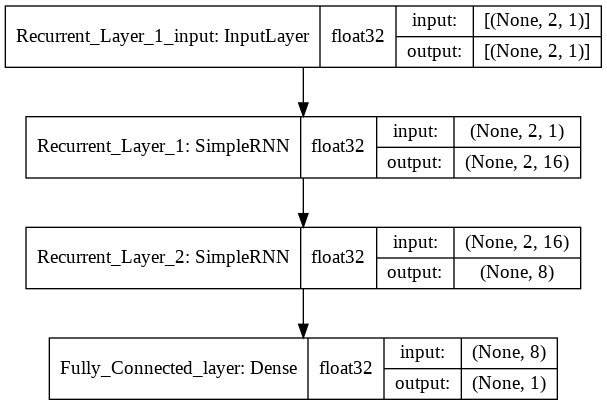

In [ ]:
tf.keras.utils.plot_model(model2, show_shapes=True, show_dtype=True, expand_nested=True)

### Model Creation

In [ ]:
class stopTraining(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('mae') < 0.025 and logs.get('val_mae') < 0.025):
      print(f"\n\nReaching desired MAE = {logs.get('mae')} and {logs.get('val_mae')} \n")
      self.model.stop_training = True

custom_callback = stopTraining()

In [ ]:
history2 = model2.fit(train_sets, epochs=200, validation_data=test_sets, callbacks=custom_callback)

Epoch 1/200
45/45 [==============================] - 2s 10ms/step - loss: 0.0173 - mae: 0.0805 - val_loss: 0.0045 - val_mae: 0.0840
Epoch 2/200
45/45 [==============================] - 0s 4ms/step - loss: 0.0318 - mae: 0.0993 - val_loss: 0.0021 - val_mae: 0.0509
Epoch 3/200
45/45 [==============================] - 0s 3ms/step - loss: 0.0122 - mae: 0.0715 - val_loss: 0.0039 - val_mae: 0.0730
Epoch 4/200
45/45 [==============================] - 0s 3ms/step - loss: 0.0117 - mae: 0.0738 - val_loss: 0.0046 - val_mae: 0.0798
Epoch 5/200
45/45 [==============================] - 0s 3ms/step - loss: 0.0196 - mae: 0.0891 - val_loss: 0.0050 - val_mae: 0.0796
Epoch 6/200
45/45 [==============================] - 0s 3ms/step - loss: 0.0215 - mae: 0.1019 - val_loss: 0.0053 - val_mae: 0.0830
Epoch 7/200
45/45 [==============================] - 0s 4ms/step - loss: 0.0213 - mae: 0.1115 - val_loss: 0.0043 - val_mae: 0.0707
Epoch 8/200
45/45 [==============================] - 0s 3ms/step - loss: 0.0082 - 

### Model Evaluation

In [ ]:
model2.evaluate(test_sets)

10/10 [==============================] - 0s 2ms/step - loss: 7.4247e-04 - mae: 0.0318


[0.0007424693321809173, 0.03184650465846062]

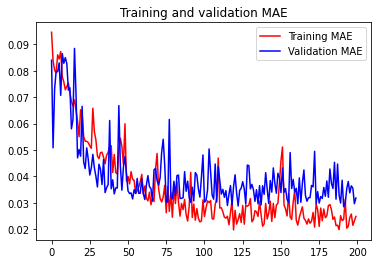

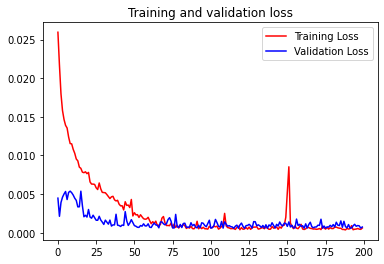

In [ ]:
mae = history2.history['mae']
val_mae = history2.history['val_mae']
loss = history2.history['loss']
val_loss = history2.history['val_loss']

epochs = range(len(mae))

plt.plot(epochs, mae, 'r', label='Training MAE')
plt.plot(epochs, val_mae, 'b', label='Validation MAE')
plt.title('Training and validation MAE')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### Whole data vs prediction

In [ ]:
df_whole = df.copy()
pred_data = df_whole["Keuangan sebenarnya"].values
pred_data = pred_data.reshape((len(pred_data)), 1)
pred_data = TimeseriesGenerator(pred_data, pred_data, length=n_features, batch_size=n_label)

In [ ]:
test_data = pred_data.data.copy()
predicted = []
for i in range(n_features):
  predicted.append(test_data[i][0])
for i in range(len(test_data)-2):
  topred = test_data[i+0:i+n_features,0]
  topred = topred.reshape(-1, n_features, 1)
  prediction = model2.predict(topred)
  # print(f"{topred} => {prediction}")
  predicted.append(prediction[0][0])

In [ ]:
len(predicted)

59

In [ ]:
df_whole['Keuangan terprediksi'] = predicted
df_whole

,Tanggal,Keuangan sebenarnya,Keuangan terprediksi
0,2020-01-01,0.973684,0.973684
1,2020-01-02,0.921053,0.921053
2,2020-01-03,0.763158,0.836786
3,2020-01-04,0.763158,0.744540
4,2020-01-05,0.736842,0.725141
5,2020-01-06,0.657895,0.697826
6,2020-01-07,0.631579,0.642788
7,2020-01-08,0.578947,0.602353
8,2020-01-09,0.526316,0.554260
9,2020-01-10,0.526316,0.502519


In [ ]:
rescale1 = minmaxscaler.inverse_transform(df_whole[["Keuangan sebenarnya"]])
rescale2 = minmaxscaler.inverse_transform(df_whole[["Keuangan terprediksi"]])

In [ ]:
df_whole[["Keuangan sebenarnya"]] = rescale1
df_whole[["Keuangan terprediksi"]] = rescale2
df_whole

,Tanggal,Keuangan sebenarnya,Keuangan terprediksi
0,2020-01-01,1900000.0,1.900000e+06
1,2020-01-02,1800000.0,1.800000e+06
2,2020-01-03,1500000.0,1.639893e+06
3,2020-01-04,1500000.0,1.464626e+06
4,2020-01-05,1450000.0,1.427768e+06
5,2020-01-06,1300000.0,1.375869e+06
6,2020-01-07,1250000.0,1.271296e+06
7,2020-01-08,1150000.0,1.194471e+06
8,2020-01-09,1050000.0,1.103094e+06
9,2020-01-10,1050000.0,1.004786e+06


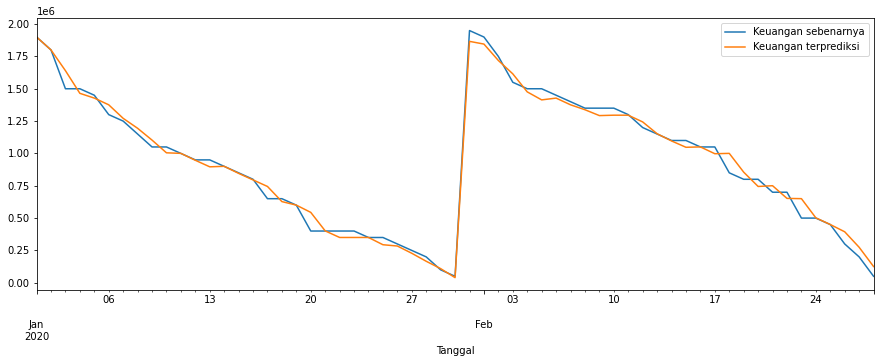

In [ ]:
df_whole.plot(x='Tanggal', y=["Keuangan sebenarnya","Keuangan terprediksi"], figsize=(15,5))
plt.show()

### Future Prediction (30 days)

In [ ]:
df_whole2 = df_whole.copy()
df_whole2 = df_whole2.drop(["Keuangan terprediksi"], axis=1)

In [ ]:
future_dates = pd.date_range(start='02-27-2020', freq='1D',periods=30)

In [ ]:
len(future_dates)

30

In [ ]:
future_data = np.zeros(30)
# future_data[0] = test_data[30:32,0][0]
# future_data[1] = test_data[30:32,0][1]
future_data[0] = test_data[-2:,0][0]
future_data[1] = test_data[-2:,0][1]
future_data = future_data.reshape((len(future_data)), 1)
for i in range(len(future_data)-2):
  topred = future_data[i+0:i+2,0]
  topred = topred.reshape(-1, 2, 1)
  prediction = model2.predict(topred)
  # print(f"{topred} => {prediction}")
  future_data[2+i] = prediction

In [ ]:
# future_data = future_data[2:]
future_data = future_data.reshape(len(future_data))

In [ ]:
data2 = {'Tanggal':future_dates, 
        'Uang':future_data} 
df_future = pd.DataFrame(data2)
rescale3 = minmaxscaler.inverse_transform(df_future[["Uang"]])
df_future[["Uang"]] = rescale3
df_future

,Tanggal,Uang
0,2020-02-27,2.000000e+05
1,2020-02-28,5.000000e+04
2,2020-02-29,1.742237e+05
3,2020-03-01,2.016534e+06
4,2020-03-02,1.540273e+06
5,2020-03-03,1.542983e+06
6,2020-03-04,1.461411e+06
7,2020-03-05,1.377660e+06
8,2020-03-06,1.313422e+06
9,2020-03-07,1.256645e+06


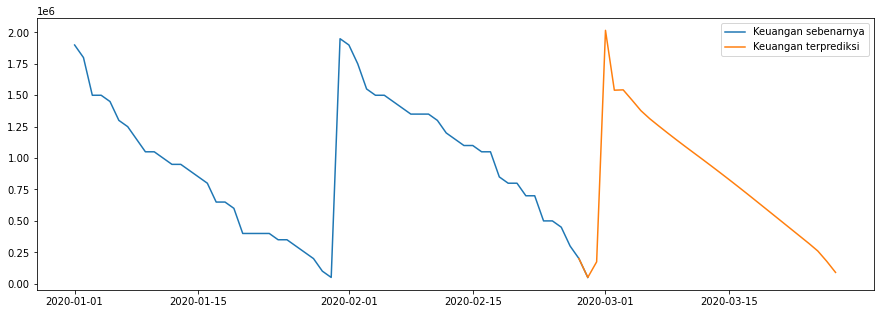

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(df_whole["Tanggal"],df_whole["Keuangan sebenarnya"], label="Keuangan sebenarnya")
plt.plot(df_future["Tanggal"],df_future["Uang"], label="Keuangan terprediksi")
plt.legend()
plt.show()